# freud.diffraction.StaticStructureFactorDirect

The `freud.diffraction.StaticStructureFactorDirect` class computes a one-dimensional [static structure factor](https://en.wikipedia.org/wiki/Structure_factor) $S(k)$ of a set of points. For an excellent introduction to the theory of scattering and $S(k)$, please refer to the documentation of the [dynasor package](https://dynasor.materialsmodeling.org/), which performs a number of calculations related to scattering. We have re-implemented the core method of static structure factor calculation from dynasor in **freud** with some additional performance optimizations in parallelized C++ code, as well as an interface to compute $S(k)$ that aligns with the APIs and conventions of the **freud** analysis library.

In [1]:
import freud
import matplotlib.pyplot as plt

Shown below is a basic example of computing the static structure factor $S(k)$ on a face-centered cubic (fcc) crystal structure.

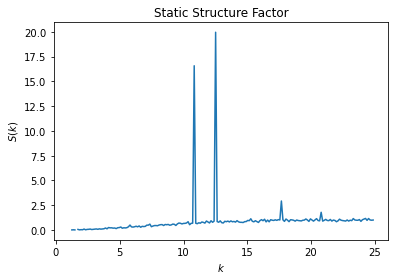

In [2]:
box, points = freud.data.UnitCell.fcc().generate_system(10, sigma_noise=0.10)
sf = freud.diffraction.StaticStructureFactorDirect(bins=200, k_max=25, k_min=1)
sf.compute((box, points))
sf.plot()
plt.show()

This demonstrates an example of computing $S(k)$ from real simulation data. This simulation data is derived from the liquid aluminum example in the [dynasor package](https://dynasor.materialsmodeling.org/). (Note that this simulation trajectory contains only a small number of frames to save space and computation time. The results shown below are slightly noisy for that reason.)

Simulation scripts and a reference calculation are available online from the dynasor package:
- https://dynasor.materialsmodeling.org/examples/aluminum.html
- https://gitlab.com/materials-modeling/dynasor/-/tree/master/examples/Aluminium_Liquid

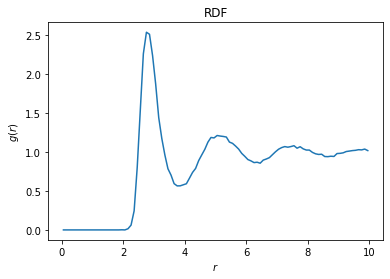

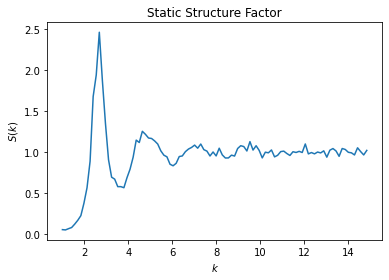

In [3]:
import gsd.hoomd

rdf = freud.density.RDF(bins=100, r_max=10)
sf = freud.diffraction.StaticStructureFactorDirect(bins=100, k_max=15.0, k_min=1.0)

with gsd.hoomd.open("data/Aluminum_Liquid_1400K.gsd") as traj:
    for frame in traj:
        rdf.compute(frame, reset=False)
        sf.compute(frame, reset=False)

rdf.plot()
sf.plot()
plt.show()

This demonstrates a calculation of the partial structure factor $S_{AB}(k)$, between a set of points and a set of query points. Here, we label the query points as type $A$ and the points as type $B$.

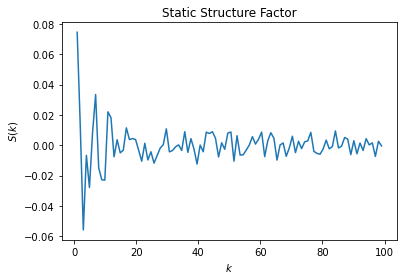

In [4]:
L = 10
N = 10000
max_k_points = 200000
box, points = freud.data.make_random_system(L, N)
system = freud.AABBQuery.from_system((box, points))
A_points = system.points[: N // 3]
B_points = system.points[N // 3 :]
sf = freud.diffraction.StaticStructureFactorDirect(
    bins=100, k_max=100, k_min=1, max_k_points=max_k_points
)
sf.compute((system.box, B_points), query_points=A_points, N_total=N)
sf.plot()
plt.show()